Accuracy: 0.8866666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       151
           1       0.88      0.89      0.89       149

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



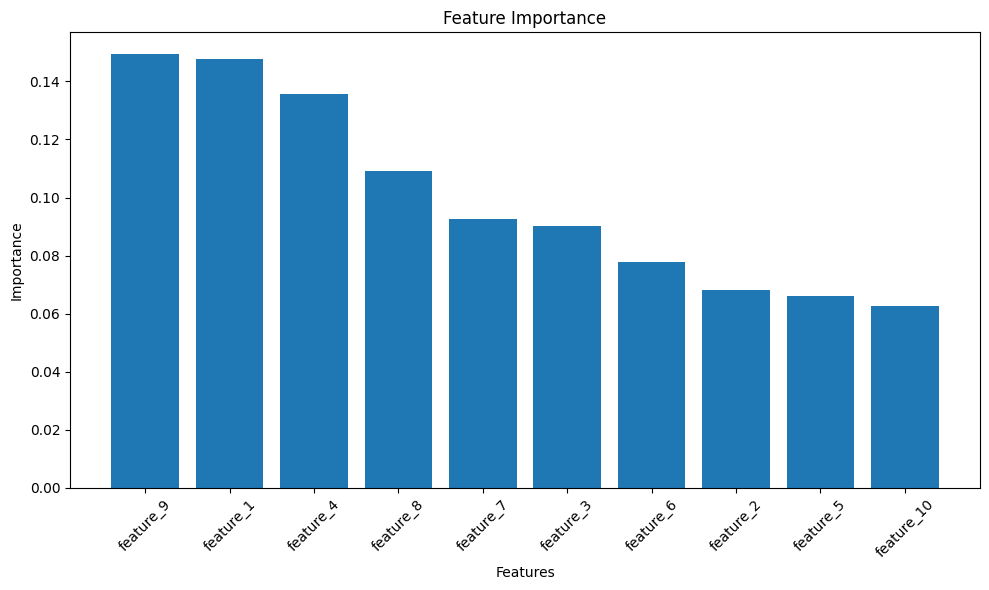

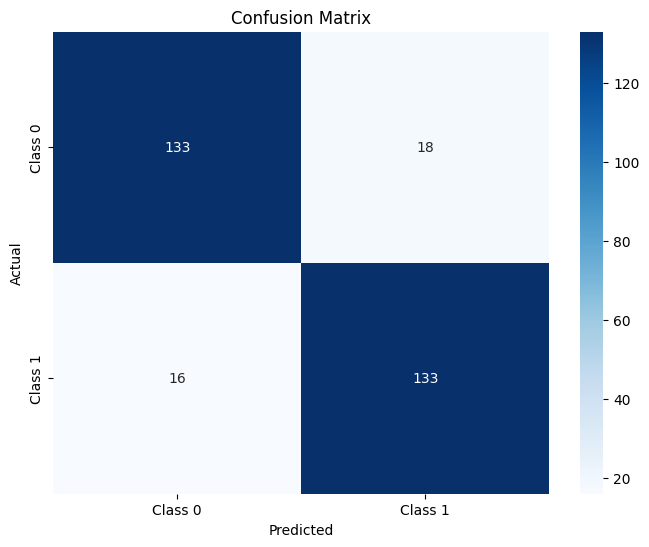

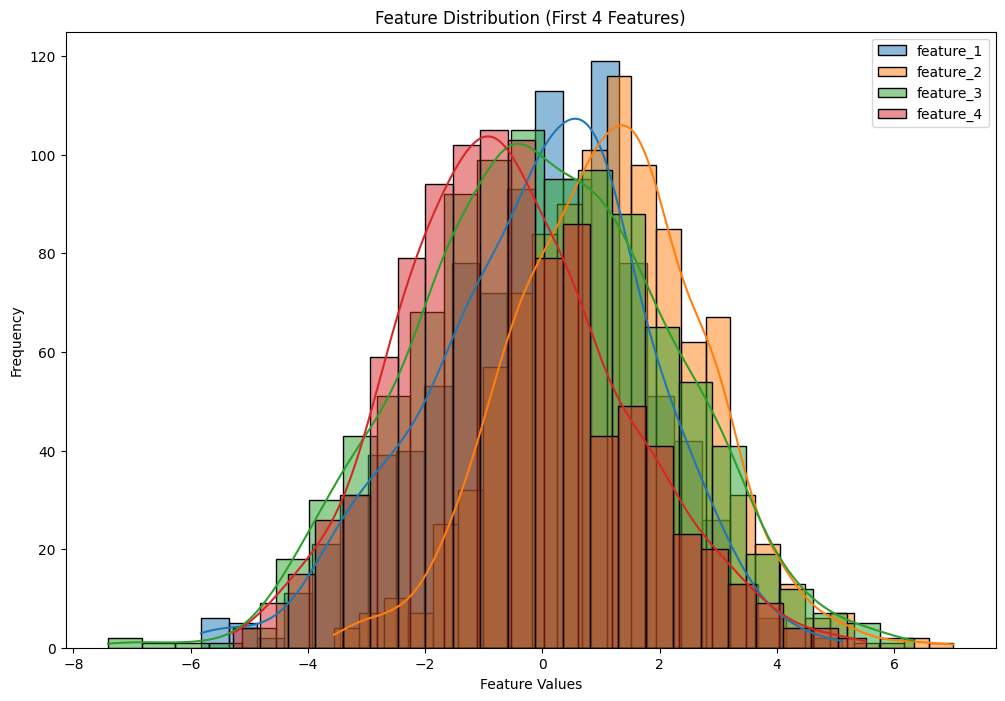

In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Creating a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=42)
feature_names = [f'feature_{i}' for i in range(1, 11)]
data = pd.DataFrame(X, columns=feature_names)
data['target'] = y

# Step 2: Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['target']), data['target'], test_size=0.3, random_state=42)

# Step 3: Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Making Predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluating Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Visual Representations

# 6.1 Feature Importance Plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# 6.2 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6.3 Feature Distribution
plt.figure(figsize=(12, 8))
for feature in feature_names[:4]:  # Display the first 4 features for simplicity
    sns.histplot(data[feature], kde=True, label=feature)
plt.title("Feature Distribution (First 4 Features)")
plt.xlabel("Feature Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()

